# Facial Emotion Recognition System

#### Import the required libraries

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import zipfile
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

#### Download the dataset

In [4]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 86% 52.0M/60.3M [00:00<00:00, 279MB/s]
100% 60.3M/60.3M [00:00<00:00, 281MB/s]


#### Unzip the folder

In [5]:
zip_ref = zipfile.ZipFile('/content/fer2013.zip')
zip_ref.extractall('/content')
zip_ref.close()

#### Preprocess the data

In [6]:
train_data = '/content/train'
test_data = '/content/test'
img_size = 48

In [7]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1.0 / 255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=train_data,
    target_size=(img_size, img_size),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training"
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_data,
    target_size=(img_size, img_size),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation"
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


#### Model architecture

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (5, 5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(2, 2),
    Dropout(0.25),

    Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPool2D(2, 2),
    Dropout(0.25),

    Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPool2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(7, activation='softmax')
])

#### Model compilation and summary

In [9]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 23, 23, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 23, 23, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 11, 11, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 5, 5, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,841,543 (14.65 MB)

 Trainable params: 3,837,575 (14.64 MB)

 Non-trainable params: 3,968 (15.50 KB)

#### Train the model

In [10]:
history = model.fit(x=train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 51s 98ms/step - accuracy: 0.1699 - loss: 9.6345 - val_accuracy: 0.1536 - val_loss: 8.9838
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.2093 - loss: 8.5283 - val_accuracy: 0.2744 - val_loss: 7.5863
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 46s 76ms/step - accuracy: 0.2244 - loss: 7.5793 - val_accuracy: 0.2905 - val_loss: 6.6106
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.2538 - loss: 6.5957 - val_accuracy: 0.3387 - val_loss: 5.6783
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 49s 91ms/step - accuracy: 0.2886 - loss: 5.6903 - val_accuracy: 0.3589 - val_loss: 4.9435
Epoch 6/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 67ms/step - accuracy: 0.3264 - loss: 4.8859 - val_accuracy: 0.3610 - val_loss: 4.2840
Epoch 7/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 38s 59ms/step - accuracy: 0.3611 - loss: 4.2134 - val_accuracy: 0.4015 - val_loss: 3.7159
Epoch 8/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 44s 67ms/step - accuracy: 0.3859 - loss: 3

#### Save the model

In [11]:
model.save("model.keras")

#### Model evaluation

In [59]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Validation Accuracy: {test_acc * 100:.2f}%")

359/359 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.7709 - loss: 1.1298
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6597 - loss: 1.4320
Train Accuracy: 77.19%
Validation Accuracy: 67.46%


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


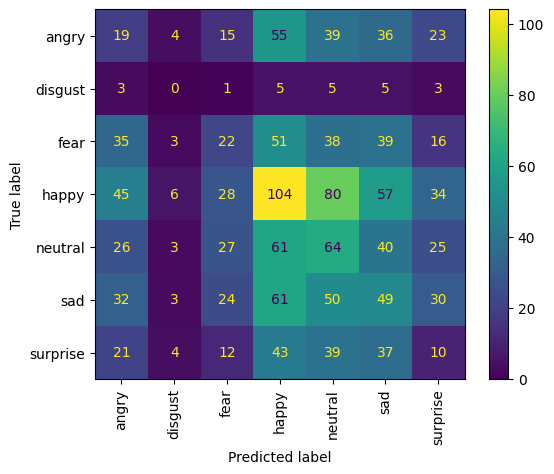

In [15]:
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))
disp.plot(xticks_rotation="vertical")
plt.show()

#### Visualizing accuracy and loss over epochs

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

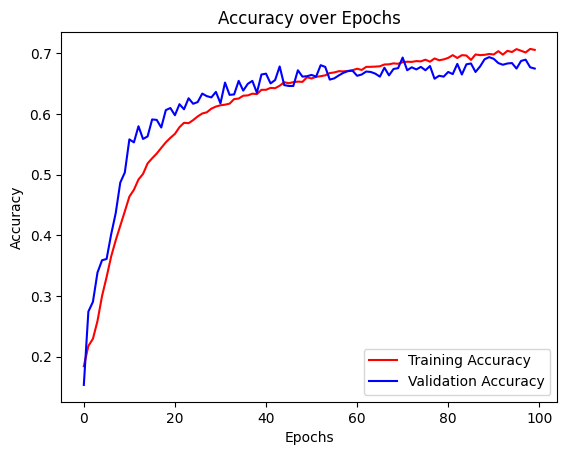

In [17]:
plt.plot(epochs_range, acc, label='Training Accuracy', color='red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='blue')
plt.legend(loc=0)
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

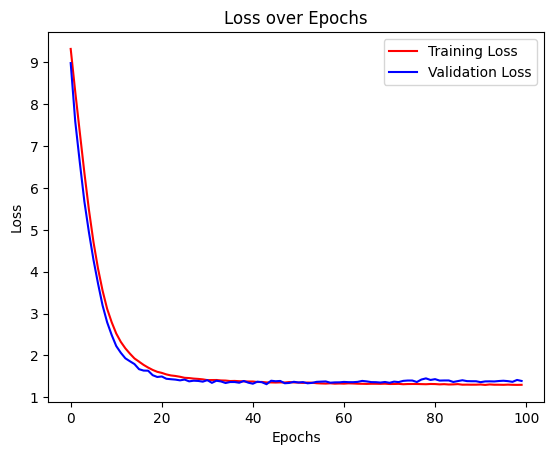

In [18]:
plt.plot(epochs_range, loss, label='Training Loss', color='red')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='blue')
plt.legend(loc=0)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### Model prediction

In [46]:
def predict_emotion(image_path, model, label_dict, target_size=(48, 48)):
    img = image.load_img(image_path, target_size=target_size, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=-1)

    emotion = label_dict[predicted_class[0]]
    confidence = np.max(prediction)

    img_original = cv2.imread(image_path)
    img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

    img_resized = cv2.resize(img_original, (256, 256), interpolation=cv2.INTER_LINEAR)

    plt.imshow(img_resized)
    plt.title(f"Predicted Emotion: {emotion}\nConfidence: {confidence:.4f}")
    plt.axis('off')
    plt.show()

    return emotion, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


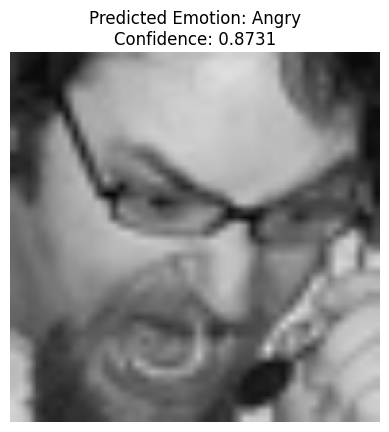

In [47]:
img_path = '/content/test/angry/PrivateTest_10131363.jpg'
emotion, confidence = predict_emotion(img_path, model, label_dict, target_size=(48, 48))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


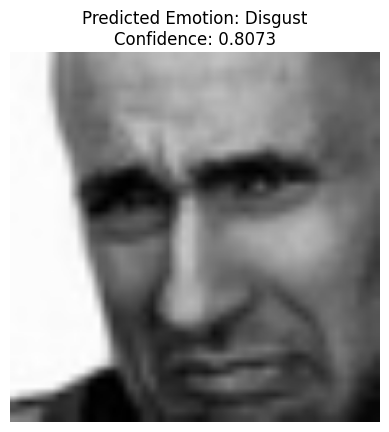

In [58]:
img_path = '/content/test/disgust/PrivateTest_36627671.jpg'
emotion, confidence = predict_emotion(img_path, model, label_dict, target_size=(48, 48))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


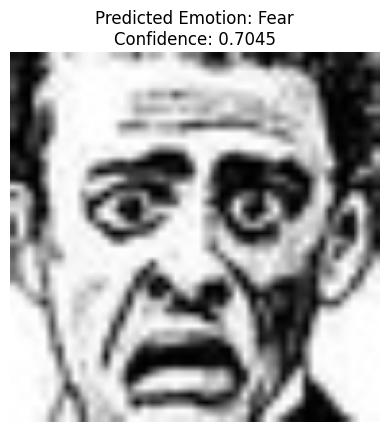

In [50]:
img_path = '/content/test/fear/PrivateTest_10306709.jpg'
emotion, confidence = predict_emotion(img_path, model, label_dict, target_size=(48, 48))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


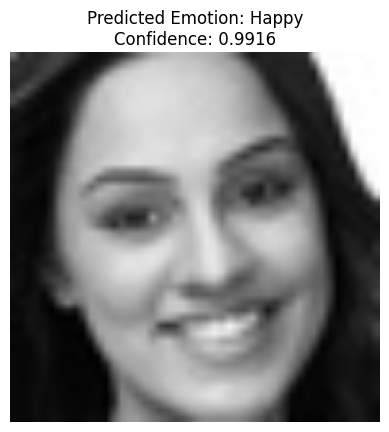

In [51]:
img_path = '/content/test/happy/PrivateTest_10613684.jpg'
emotion, confidence = predict_emotion(img_path, model, label_dict, target_size=(48, 48))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


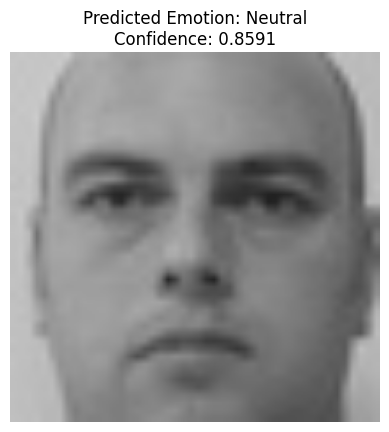

In [56]:
img_path = '/content/test/neutral/PrivateTest_11752870.jpg'
emotion, confidence = predict_emotion(img_path, model, label_dict, target_size=(48, 48))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


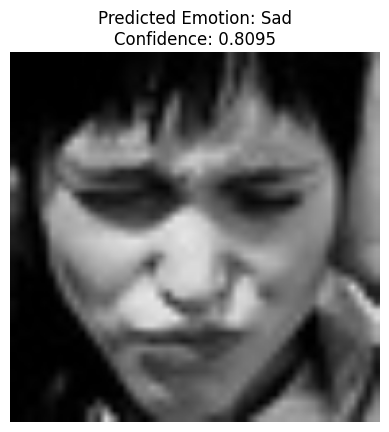

In [55]:
img_path = '/content/test/sad/PrivateTest_10455506.jpg'
emotion, confidence = predict_emotion(img_path, model, label_dict, target_size=(48, 48))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


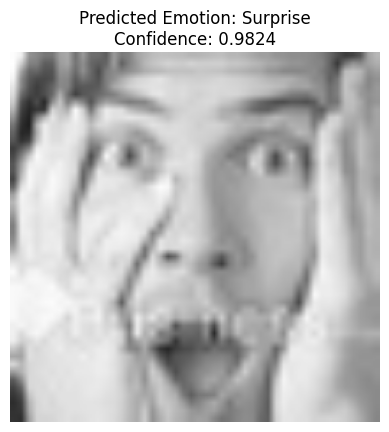

In [57]:
img_path = '/content/test/surprise/PrivateTest_10072988.jpg'
emotion, confidence = predict_emotion(img_path, model, label_dict, target_size=(48, 48))